# __1. Import Packages__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# __2. Dataset Overview__

In [2]:
raw_data = pd.read_csv('./imports-by-country-breed-type-age-and-sex-april-2009-1.csv', skiprows=1)

This dataset as reported to the Rural Payments Agency contains Imports by country of export, breed type, age and sex April 2009 Attribution statement.

In [3]:
raw_data.head()

,Age,Breed Type,Sex,AUSTRIA,CZECH REPUBLIC,DENMARK,FRANCE,GERMANY,IRELAND,NETHERLANDS,NORTHERN IRELAND,SWEDEN,Unnamed: 12
0,Under 1,Non Dairy,F,0,0,0,0,0,24,0,2,0,30
1,NaN,NaN,M,0,0,0,0,0,0,0,1,0,3
2,1 to 2,Non Dairy,F,0,0,0,0,0,18,0,0,0,19
3,NaN,NaN,M,0,0,0,0,0,0,0,1,0,5
4,2 to 3,Dairy,M,0,0,0,0,0,0,0,14,0,14


In [4]:
raw_data.tail()

,Age,Breed Type,Sex,AUSTRIA,CZECH REPUBLIC,DENMARK,FRANCE,GERMANY,IRELAND,NETHERLANDS,NORTHERN IRELAND,SWEDEN,Unnamed: 12
40,NaN,NaN,M,0,0,0,0,0,0,0,0,0,1
41,72 and Over,Dairy,F,0,0,0,15,0,3,0,4,0,25
42,NaN,Non Dairy,F,0,0,0,0,0,0,0,12,0,66
43,NaN,NaN,M,0,0,0,0,0,0,0,1,0,2
44,Total,NaN,NaN,20,23,41,101,192,274,335,"1,582",34,"2,799"


In [5]:
raw_data.shape

(45, 13)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               15 non-null     object
 1   Breed Type        26 non-null     object
 2   Sex               44 non-null     object
 3   AUSTRIA           45 non-null     int64 
 4   CZECH REPUBLIC    45 non-null     int64 
 5   DENMARK           45 non-null     int64 
 6   FRANCE            45 non-null     int64 
 7   GERMANY           45 non-null     int64 
 8   IRELAND           45 non-null     int64 
 9   NETHERLANDS       45 non-null     int64 
 10  NORTHERN IRELAND  45 non-null     object
 11  SWEDEN            45 non-null     int64 
 12  Unnamed: 12       45 non-null     object
dtypes: int64(8), object(5)
memory usage: 4.7+ KB


# __3. Data Preperation__

In [7]:
data = raw_data.copy(deep=True)

In [8]:
data.columns

Index(['Age', 'Breed Type', 'Sex', 'AUSTRIA', 'CZECH REPUBLIC', 'DENMARK',
       'FRANCE', 'GERMANY', 'IRELAND', 'NETHERLANDS', 'NORTHERN IRELAND',
       'SWEDEN', 'Unnamed: 12'],
      dtype='object')

In [9]:
data.columns = data.columns.str.replace(' ', '_')

In [10]:
data.columns = data.columns.str.capitalize()

In [11]:
data.columns

Index(['Age', 'Breed_type', 'Sex', 'Austria', 'Czech_republic', 'Denmark',
       'France', 'Germany', 'Ireland', 'Netherlands', 'Northern_ireland',
       'Sweden', 'Unnamed:_12'],
      dtype='object')

In [12]:
data = data.drop(44)
data.drop(columns=['Unnamed:_12'], inplace=True)

In [13]:
data['Northern_ireland'] = data['Northern_ireland'].astype('int64')

In [14]:
data.head()

,Age,Breed_type,Sex,Austria,Czech_republic,Denmark,France,Germany,Ireland,Netherlands,Northern_ireland,Sweden
0,Under 1,Non Dairy,F,0,0,0,0,0,24,0,2,0
1,NaN,NaN,M,0,0,0,0,0,0,0,1,0
2,1 to 2,Non Dairy,F,0,0,0,0,0,18,0,0,0
3,NaN,NaN,M,0,0,0,0,0,0,0,1,0
4,2 to 3,Dairy,M,0,0,0,0,0,0,0,14,0


In [15]:
data2= pd.melt(data, id_vars=['Age', 'Breed_type', 'Sex'], var_name='Country', value_name='Total')

In [16]:
pd.melt(data, id_vars=['Age', 'Breed_type', 'Sex'], var_name='Country', value_name='Total').to_csv('cow_bought(April_2009).csv')

# __4. Exploratory Data Analysis__

In [17]:
name = []
value = []
percentage = []

for column in data2.columns:
    if data2[column].isnull().any():
            name.append(column), 
            value.append(data2[column].isna().sum()),   
            percentage.append(f'{round(data2[column].isna().sum()/data2.shape[0]*100, 2)}%')

pd.DataFrame(
    {'Name':name, 'Value':value, 'Percentage':percentage}
)

,Name,Value,Percentage
0,Age,270,68.18%
1,Breed_type,162,40.91%


- Missed values are not at random

In [18]:
# Age and Breed type imputation
data2['Age'] = data2['Age'].fillna(method='ffill')

data2['Breed_type'] = data2['Breed_type'].fillna(method='ffill')

In [19]:
cat_cols =['Age', 'Breed_type', 'Sex', 'Country']

for column in cat_cols:
    print(data2[column].value_counts().sort_values(ascending=True))

Under 1        18
1 to 2         18
2 to 3         27
3 to 4         27
4 to 5         27
5 to 6         27
30 to 36       27
48 to 60       27
60 to 72       27
72 and Over    27
6 to 12        36
12 to 24       36
24 to 30       36
36 to 48       36
Name: Age, dtype: int64
Dairy        144
Non Dairy    252
Name: Breed_type, dtype: int64
F    198
M    198
Name: Sex, dtype: int64
Austria             44
Czech_republic      44
Denmark             44
France              44
Germany             44
Ireland             44
Netherlands         44
Northern_ireland    44
Sweden              44
Name: Country, dtype: int64


## __Univariate Analysis__

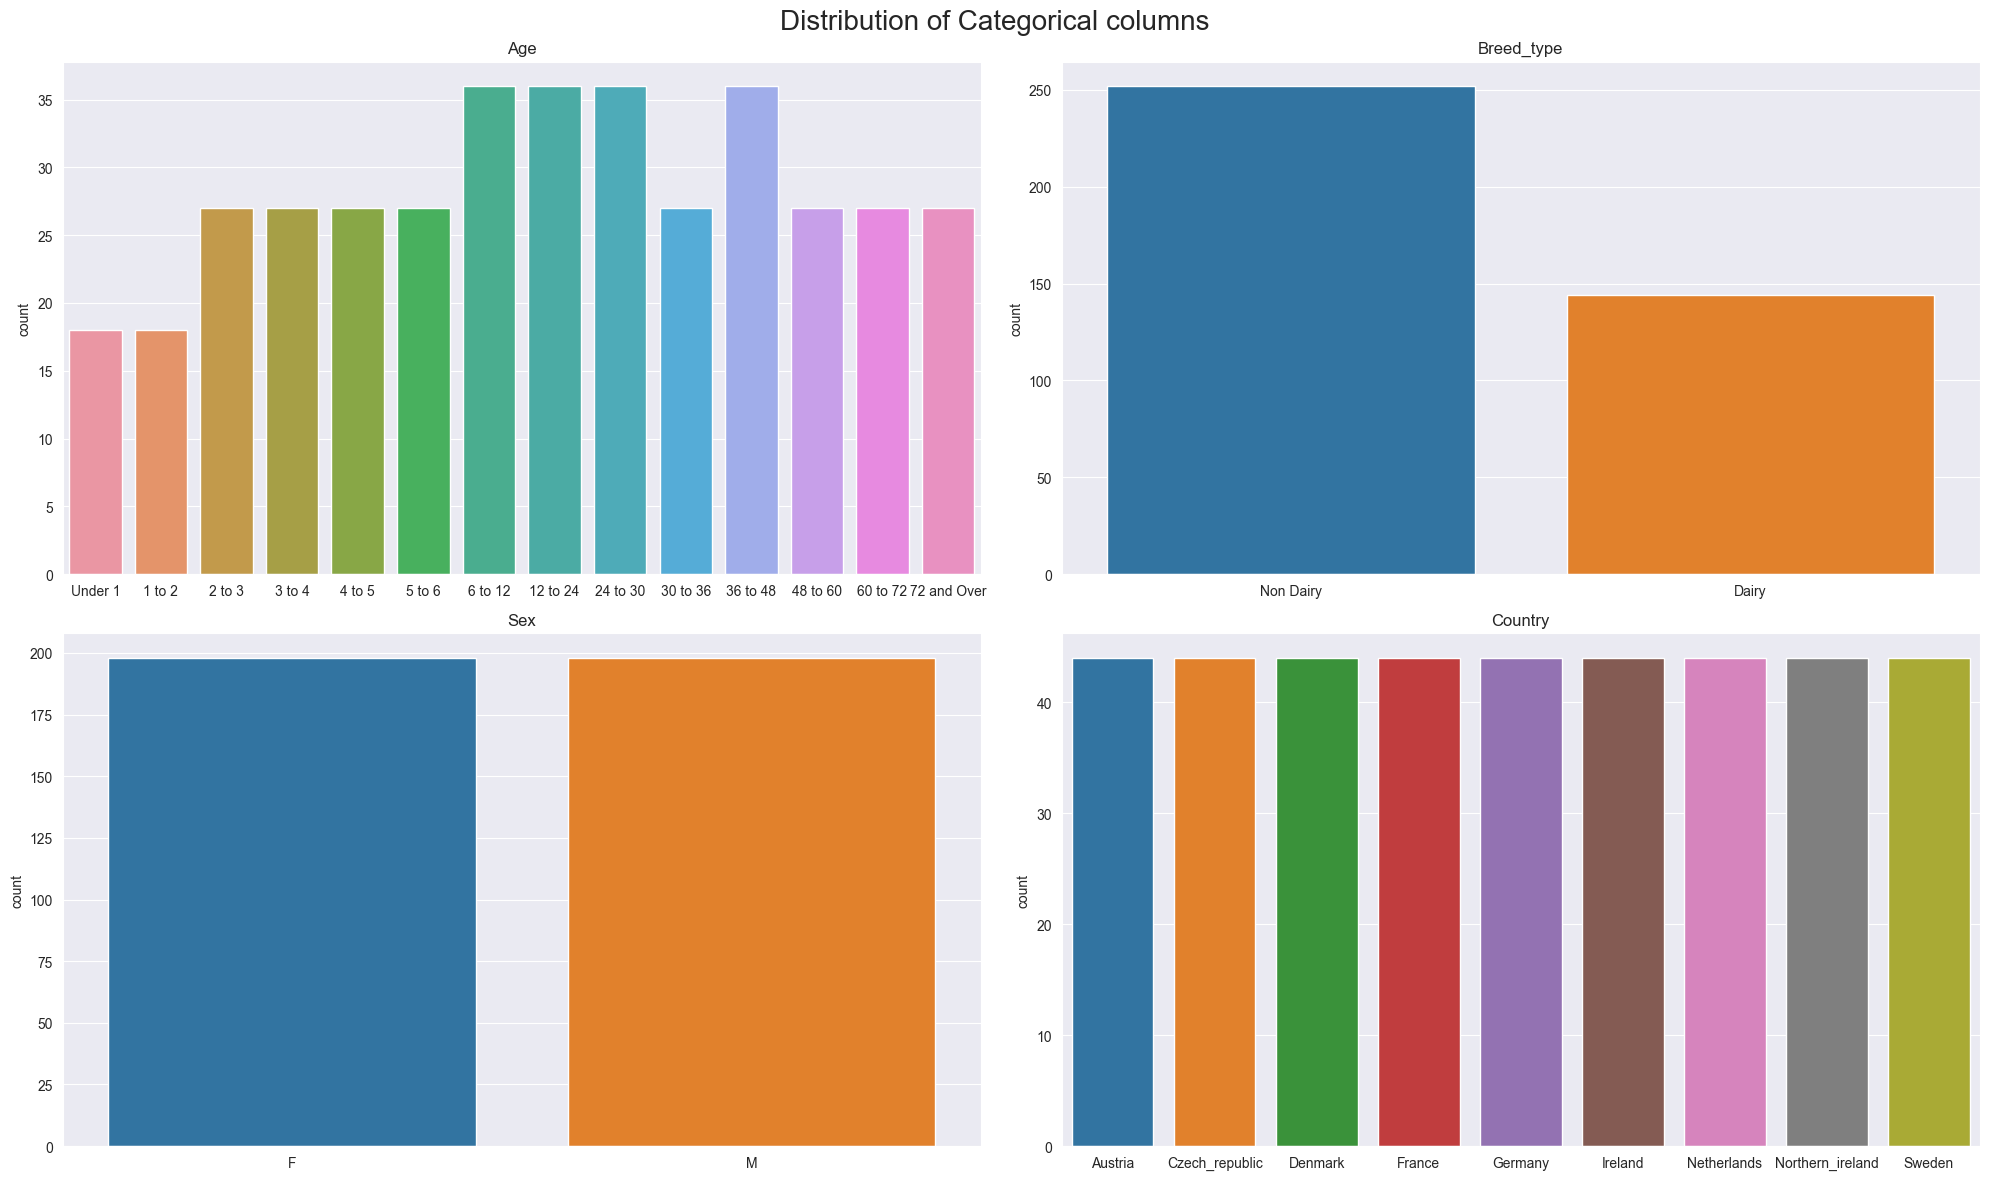

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))

axes = axes.flat

for index, column in enumerate(data2[cat_cols]):
    sns.countplot(
        data=data2,
        x=column,
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(column)

fig.suptitle('Distribution of Categorical columns', size=20)
fig.tight_layout()

(0.0, 200.0)

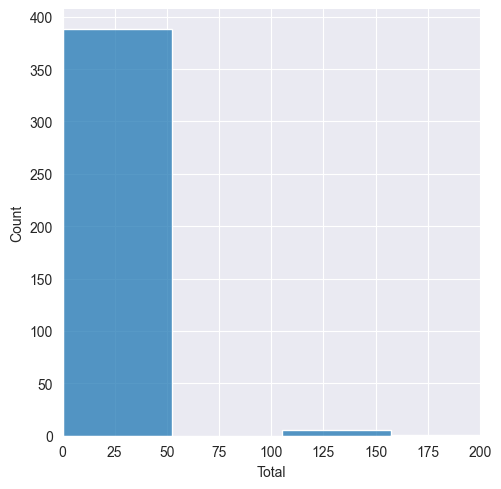

In [21]:
sns.displot(data=data2, x='Total', bins=10, kind='hist')
plt.xlim(0,200)

## __Bivariate Analysis__

In [22]:
data2.head()

,Age,Breed_type,Sex,Country,Total
0,Under 1,Non Dairy,F,Austria,0
1,Under 1,Non Dairy,M,Austria,0
2,1 to 2,Non Dairy,F,Austria,0
3,1 to 2,Non Dairy,M,Austria,0
4,2 to 3,Dairy,M,Austria,0


In [23]:
pd.pivot_table(
    data=data2, 
    index=['Country', 'Breed_type'], 
    columns=['Age'], 
    values='Total', 
    aggfunc=np.sum)\
    .fillna(value=0.0)

Age                          1 to 2  12 to 24  2 to 3  24 to 30  3 to 4  \
Country          Breed_type                                               
Austria          Dairy          0.0      11.0     0.0       9.0     0.0   
                 Non Dairy      0.0       0.0     0.0       0.0     0.0   
Czech_republic   Dairy          0.0      23.0     0.0       0.0     0.0   
                 Non Dairy      0.0       0.0     0.0       0.0     0.0   
Denmark          Dairy          0.0      40.0     0.0       0.0     0.0   
                 Non Dairy      0.0       0.0     0.0       0.0     0.0   
France           Dairy          0.0       2.0     0.0      11.0     0.0   
                 Non Dairy      0.0       2.0     0.0       0.0     0.0   
Germany          Dairy          0.0       6.0     0.0     147.0     0.0   
                 Non Dairy      0.0       0.0     0.0       0.0     0.0   
Ireland          Dairy          0.0     133.0     0.0      13.0     0.0   
                 Non Dairy     18.0      32.0     0.0      21.0     0.0   
Netherlands      Dairy          0.0     139.0     0.0     155.0     0.0   
                 Non Dairy      0.0       0.0     0.0       1.0     0.0   
Northern_ireland Dairy          0.0      18.0    14.0      61.0    45.0   
                 Non Dairy      1.0     696.0     1.0     526.0     1.0   
Sweden           Dairy          0.0      25.0     0.0       7.0     0.0   
                 Non Dairy      0.0       0.0     0.0       0.0     0.0   

Age                          30 to 36  36 to 48  4 to 5  48 to 60  5 to 6  \
Country          Breed_type                                                 
Austria          Dairy            0.0       0.0     0.0       0.0     0.0   
                 Non Dairy        0.0       0.0     0.0       0.0     0.0   
Czech_republic   Dairy            0.0       0.0     0.0       0.0     0.0   
                 Non Dairy        0.0       0.0     0.0       0.0     0.0   
Denmark          Dairy            0.0       0.0     0.0       0.0     0.0   
                 Non Dairy        0.0       1.0     0.0       0.0     0.0   
France           Dairy           15.0      24.0     0.0      14.0     0.0   
                 Non Dairy        0.0       0.0     0.0       0.0     0.0   
Germany          Dairy           29.0       9.0     0.0       1.0     0.0   
                 Non Dairy        0.0       0.0     0.0       0.0     0.0   
Ireland          Dairy            1.0      11.0     0.0       6.0     0.0   
                 Non Dairy        2.0       0.0     0.0       0.0     0.0   
Netherlands      Dairy           21.0       4.0     2.0       0.0     0.0   
                 Non Dairy        0.0       1.0     0.0       0.0     0.0   
Northern_ireland Dairy           15.0      21.0    15.0      10.0    16.0   
                 Non Dairy       53.0      12.0     3.0      13.0     2.0   
Sweden           Dairy            0.0       1.0     0.0       0.0     0.0   
                 Non Dairy        0.0       0.0     0.0       0.0     0.0   

Age                          6 to 12  60 to 72  72 and Over  Under 1  
Country          Breed_type                                           
Austria          Dairy           0.0       0.0          0.0      0.0  
                 Non Dairy       0.0       0.0          0.0      0.0  
Czech_republic   Dairy           0.0       0.0          0.0      0.0  
                 Non Dairy       0.0       0.0          0.0      0.0  
Denmark          Dairy           0.0       0.0          0.0      0.0  
                 Non Dairy       0.0       0.0          0.0      0.0  
France           Dairy           0.0      18.0         15.0      0.0  
                 Non Dairy       0.0       0.0          0.0      0.0  
Germany          Dairy           0.0       0.0          0.0      0.0  
                 Non Dairy       0.0       0.0          0.0      0.0  
Ireland          Dairy           4.0       6.0          3.0      0.0  
                 Non Dairy       0.

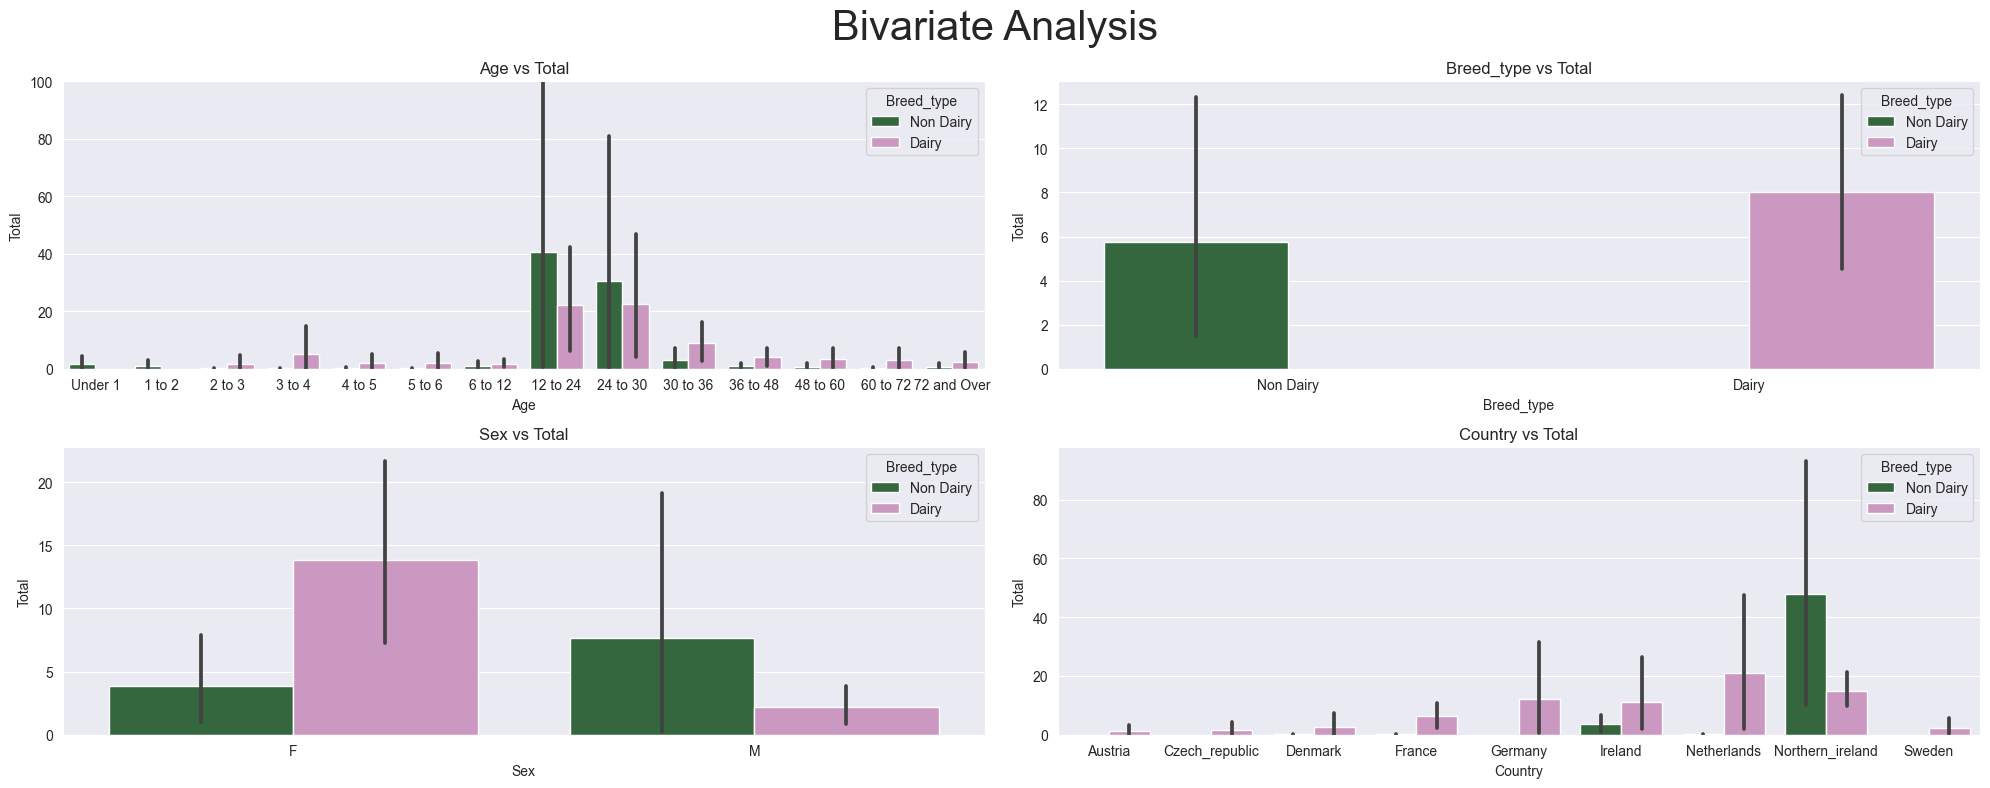

In [24]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 8))

axes = axes.flat
cat_cols =['Age', 'Breed_type', 'Sex', 'Country']
for index, column in enumerate(data2[cat_cols].columns):
    sns.barplot(
        data=data2,
        x=column,
        y='Total',
        hue='Breed_type',
        palette='cubehelix',
        ax=axes[index]
)
    
    axes[index].set_title((f'{column} vs Total'))
    # axes[index].set_xticks()
axes[0].set(ylim=(0, 100))
fig.suptitle('Bivariate Analysis', size=30)
fig.tight_layout()

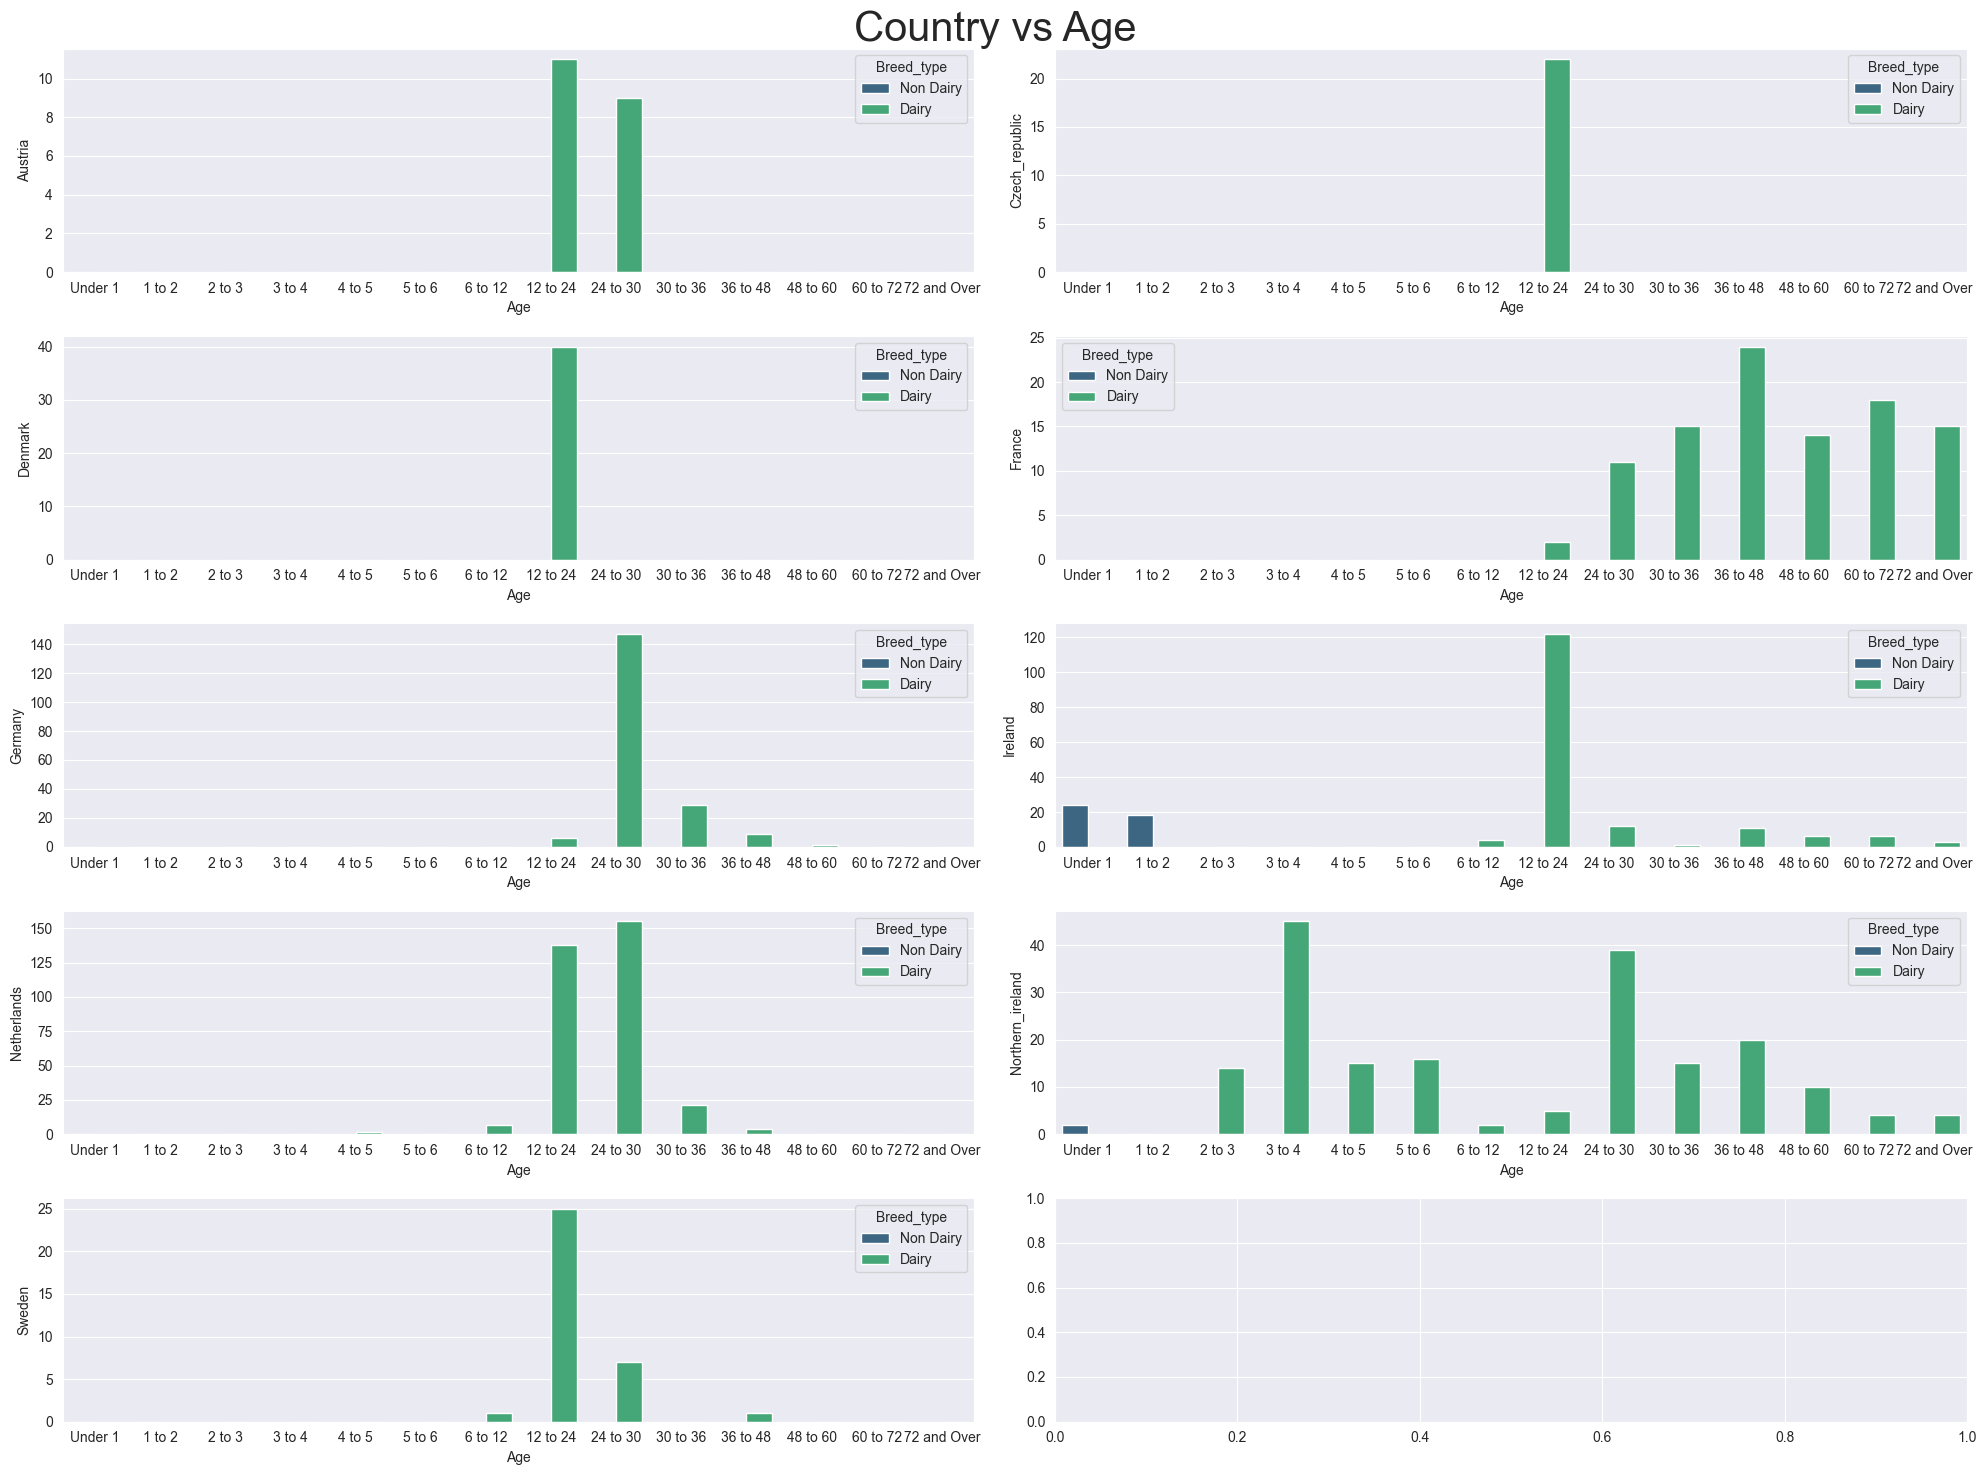

In [25]:
country_cols = ['Austria', 'Czech_republic', 'Denmark',
                'France', 'Germany', 'Ireland', 'Netherlands', 
                'Northern_ireland', 'Sweden']

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20, 15))

axes = axes.flat

for index, column in enumerate(data[country_cols]):
    sns.barplot(
        data=data,
        x='Age',
        y=column,
        hue='Breed_type',
        palette='viridis',
        ax=axes[index]
)
fig.suptitle('Country vs Age', size=30)
fig.tight_layout()

- Most of the country bought dairy breed animals.
- Only Northern Ireland country bought most non dairy breed type animals.
- Ireland country exclusively bought under age of 2 non dairy breed type animals.
- Northern Ireland and Netherlands bought below 6 aged animals.
- France country bought 12 age to 72 age dairy breed type animals.
- Northern Ireland country bought 

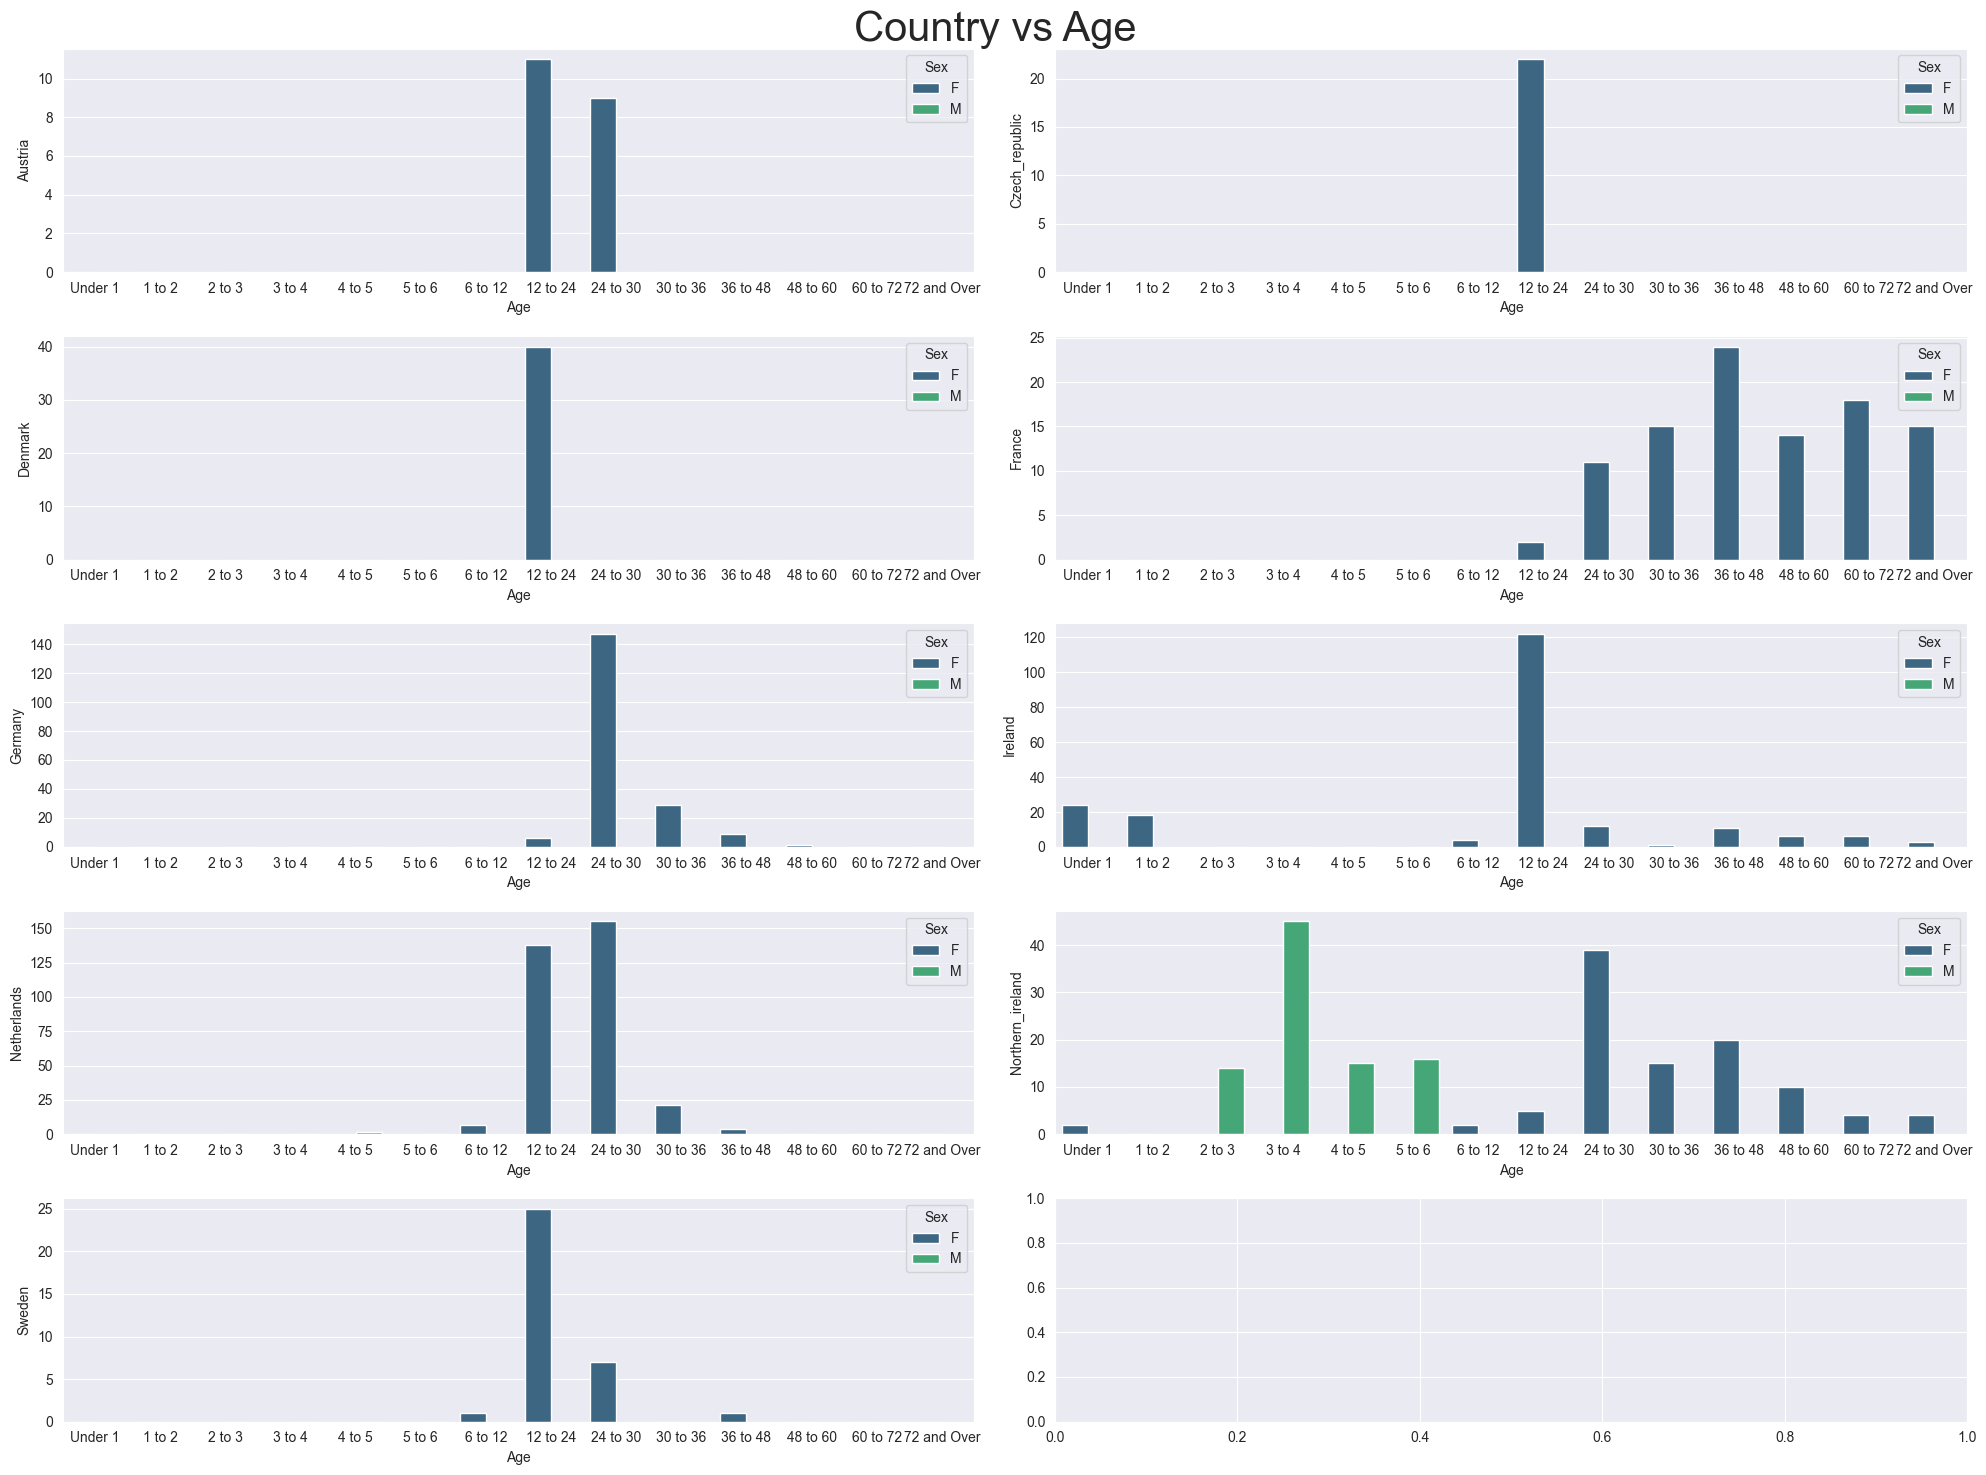

In [26]:
country_cols = ['Austria', 'Czech_republic', 'Denmark',
                'France', 'Germany', 'Ireland', 'Netherlands', 
                'Northern_ireland', 'Sweden']

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20, 15))

axes = axes.flat

for index, column in enumerate(data[country_cols]):
    sns.barplot(
        data=data,
        x='Age',
        y=column,
        hue='Sex',
        palette='viridis',
        ax=axes[index]
)
fig.suptitle('Country vs Age', size=30)
fig.tight_layout()

## __Multivariate Analyis__

- Most of the country bought female type animals. 


In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in data2.iloc[:, 0:4]:
    data2[column] = encoder.fit_transform(data2[column].values)

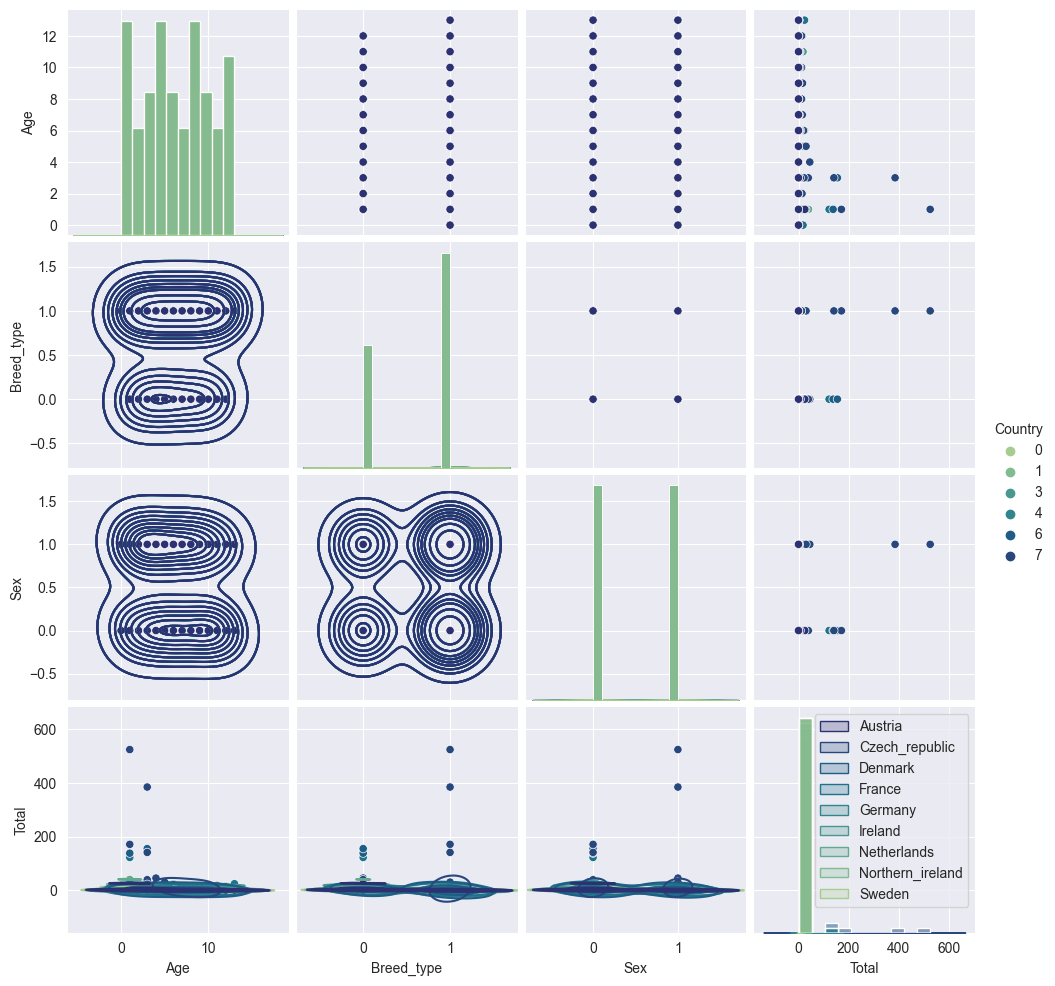

In [42]:
graph = sns.pairplot(data2, hue='Country', palette='crest')
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.histplot)
plt.legend(labels=['Austria', 'Czech_republic', 'Denmark', 'France', 
                    'Germany', 'Ireland', 'Netherlands', 'Northern_ireland','Sweden']
                    )


# __Clustering__

In [85]:
data2.drop(columns=['Total'], inplace=True)

In [86]:
from sklearn.cluster import KMeans

wcss = []
k_range = range(1, 7)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)

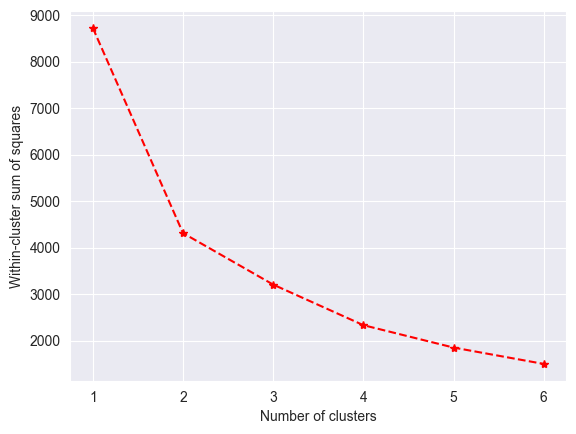

In [87]:
# Plot the WCSS versus the number of clusters
plt.plot(k_range, wcss, '*--', c='red')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [88]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(data2)

labels = kmeans.labels_

data2['cluster'] = labels

In [89]:
data2.head()

,Age,Breed_type,Sex,Country,cluster
0,13,1,0,0,1
1,13,1,1,0,1
2,0,1,0,0,0
3,0,1,1,0,0
4,2,0,1,0,0


In [90]:
from sklearn import metrics

silhouette_score = metrics.silhouette_score(data2, labels, metric='euclidean')
print("Silhouette Score: ", silhouette_score)

Silhouette Score:  0.40078919699537313


In [91]:
# Splitting the dataset into target and features
x=data2.iloc[:, 0:-1]
y=data2.iloc[:,-1]

In [92]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=4, test_size=0.33, stratify=y)

In [93]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (265, 4)
xtest shape:  (131, 4)
ytrain shape:  (265,)
ytest shape:  (131,)


In [94]:
# building the model

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def select_model_predict(model):
    
    # Training the model
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #Checking Bias-variance tradeoff
    train_accuracy = model.score(xtrain, ytrain)
    test_accuracy = model.score(xtest, ytest)
    
    #Converting Accuracy score into dataframe
    dataframe = pd.DataFrame(
        [train_accuracy*100, test_accuracy*100], 
        index=['Train Accuracy', 'Test Accuracy'], 
        columns=['Value'])
    print(model)
    print(dataframe)
    print('\n')

    sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
    
    # Classification Report for the model
    report = classification_report(ytest, ypred)
    print(report)
    
    return model

GaussianNB()
                    Value
Train Accuracy  97.735849
Test Accuracy   95.419847


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        38
           1       0.98      0.96      0.97        56
           2       1.00      0.89      0.94        37

    accuracy                           0.95       131
   macro avg       0.96      0.95      0.95       131
weighted avg       0.96      0.95      0.95       131



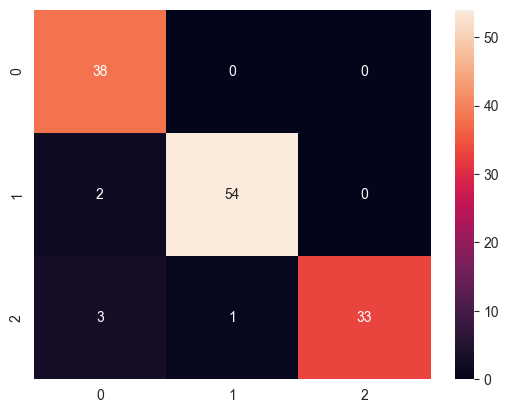

In [95]:
gnb = select_model_predict(GaussianNB())

MultinomialNB()
                    Value
Train Accuracy  76.226415
Test Accuracy   72.519084


              precision    recall  f1-score   support

           0       0.92      0.29      0.44        38
           1       0.70      0.95      0.80        56
           2       0.72      0.84      0.77        37

    accuracy                           0.73       131
   macro avg       0.78      0.69      0.67       131
weighted avg       0.77      0.73      0.69       131



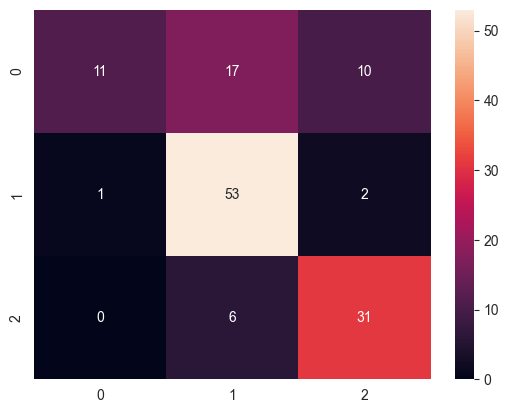

In [96]:
mnb = select_model_predict(MultinomialNB())

BernoulliNB()
                    Value
Train Accuracy  49.056604
Test Accuracy   43.511450


              precision    recall  f1-score   support

           0       0.46      0.16      0.24        38
           1       0.43      0.88      0.57        56
           2       0.67      0.05      0.10        37

    accuracy                           0.44       131
   macro avg       0.52      0.36      0.30       131
weighted avg       0.50      0.44      0.34       131



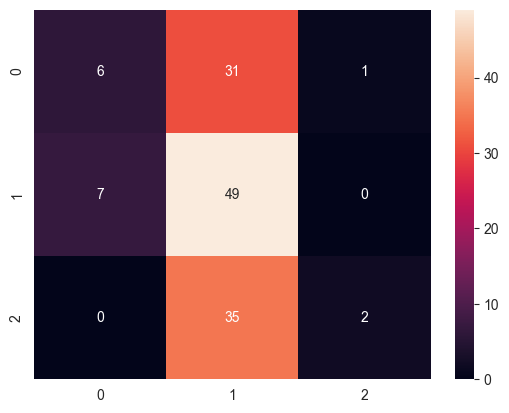

In [97]:
bnb = select_model_predict(BernoulliNB())

LogisticRegression()
                     Value
Train Accuracy  100.000000
Test Accuracy    99.236641


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      1.00      1.00        56
           2       0.97      1.00      0.99        37

    accuracy                           0.99       131
   macro avg       0.99      0.99      0.99       131
weighted avg       0.99      0.99      0.99       131



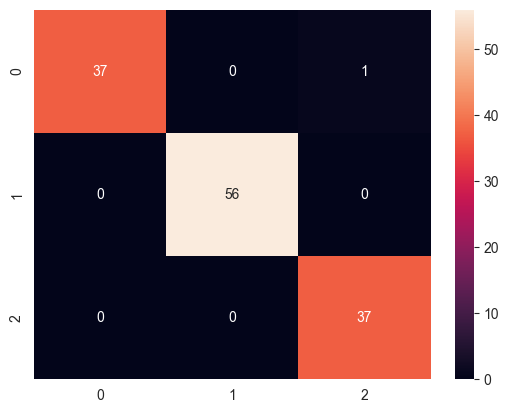

In [98]:
lr = select_model_predict(LogisticRegression())